In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('train.csv')

# Display first 5 rows
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
print(f"Dataset shape: {df.shape}")
print(df.info())


Dataset shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
df.describe(include='all')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Fill Age missing values with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked missing values with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin column for now
df.drop('Cabin', axis=1, inplace=True)


C:\Users\Dell\AppData\Local\Temp\ipykernel_46816\1103598921.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_46816\1103598921.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [6]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
print(df['Survived'].value_counts(normalize=True))


Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


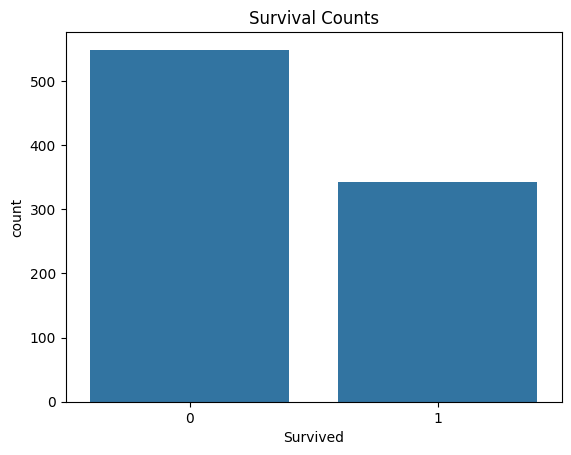

In [9]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Counts')
plt.show()


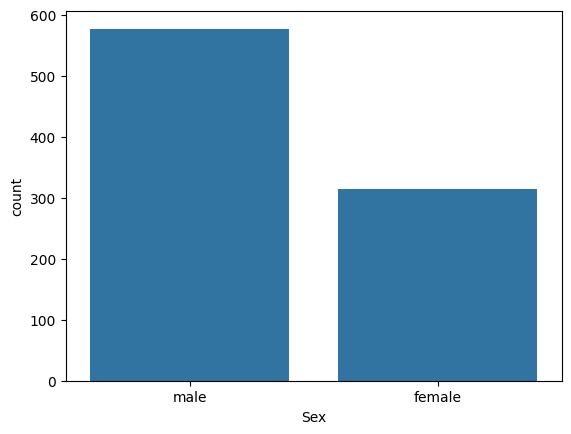

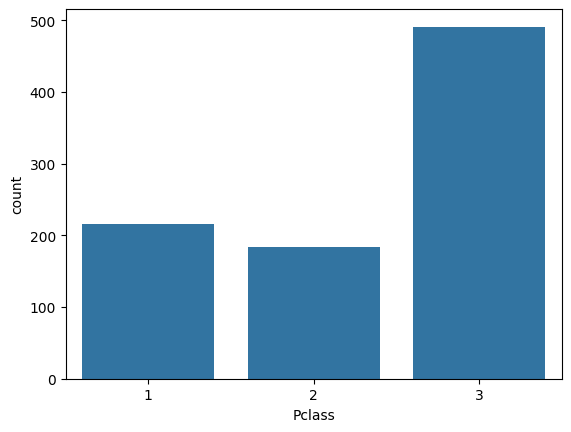

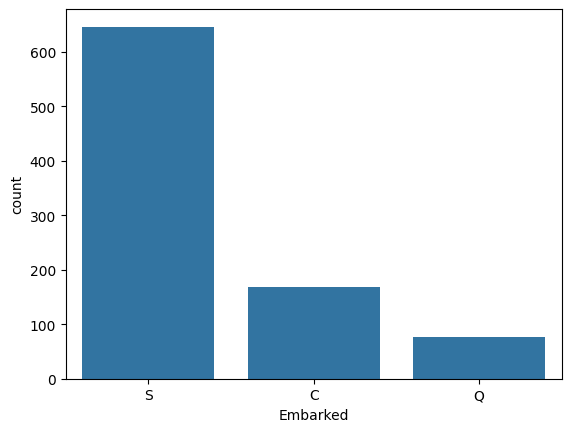

In [10]:
sns.countplot(x='Sex', data=df)
plt.show()

sns.countplot(x='Pclass', data=df)
plt.show()

sns.countplot(x='Embarked', data=df)
plt.show()


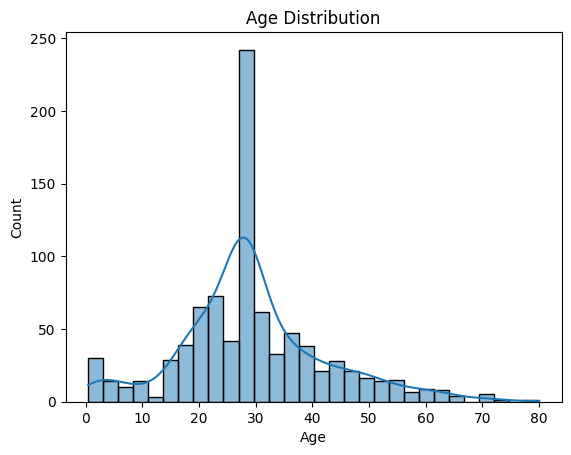

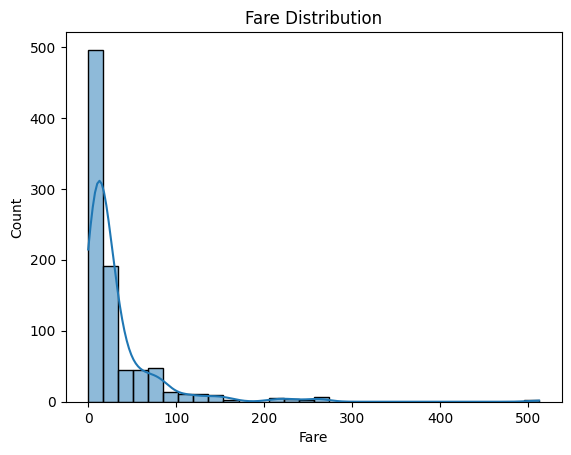

In [11]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()


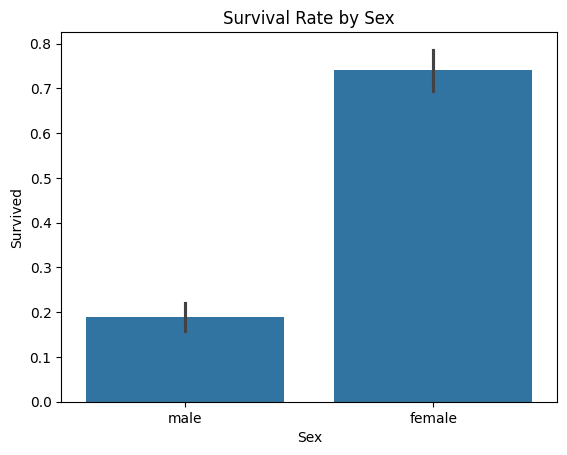

In [12]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()


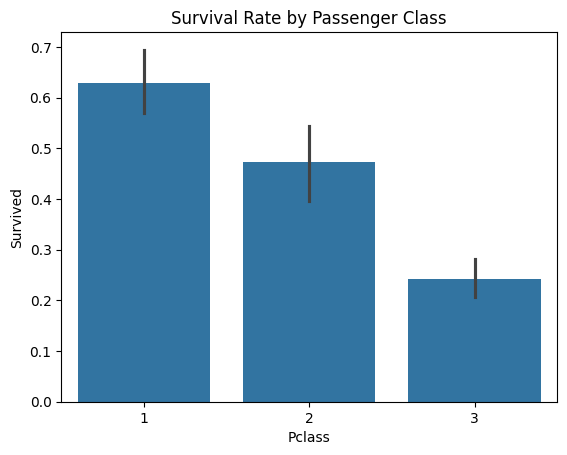

In [13]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()


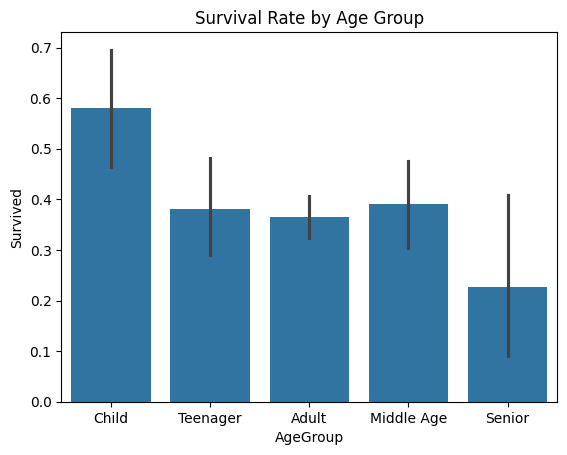

In [14]:
bins = [0, 12, 20, 40, 60, 80]
labels = ['Child', 'Teenager', 'Adult', 'Middle Age', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

sns.barplot(x='AgeGroup', y='Survived', data=df)
plt.title('Survival Rate by Age Group')
plt.show()


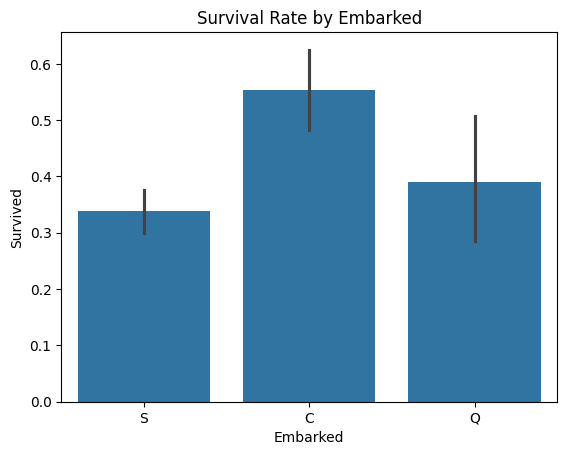

In [19]:
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Embarked')
plt.show()


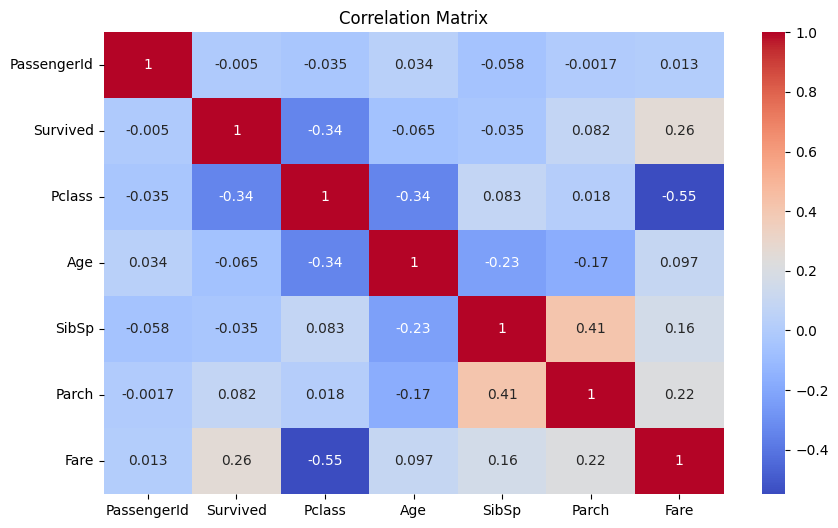

In [21]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



📌 Summary of Findings

Based on the Exploratory Data Analysis (EDA) performed on the Titanic dataset, here are the key insights and patterns observed:

🔍 Strong Predictors of Survival
‍👩‍🦰 Sex: Female passengers had a significantly higher survival rate compared to males. This makes gender one of the strongest indicators of survival.

🎟️ Pclass (Passenger Class): Passengers in 1st class had the highest survival rate, while those in 3rd class had the lowest. Higher socio-economic status correlated with higher chances of survival.

🚢 Embarked: Passengers who boarded from Cherbourg (Embarked = C) showed a higher survival rate than those from other ports.

🧒 Age: Younger passengers (especially children) had slightly better survival rates compared to older age groups.

📈 Other Observations
💰 Fare: Higher fare seemed to loosely correlate with higher survival, which may reflect socio-economic status and cabin location.

🧍 Family Size: Passengers with 1–2 family members (SibSp/Parch) had better survival than those traveling alone or in large families.

🛏 Cabin Information: While not used in this EDA due to missing values, the presence/absence of cabin data may correlate with class and thus survival.

🧠 Implications for Predictive Modeling
The features Sex, Pclass, Age, and Embarked should be prioritized for feature engineering in any survival prediction model.

Encoding categorical variables (Sex, Embarked, Pclass) and scaling numeric ones (Age, Fare) will help improve model performance.

Creating new features like AgeGroup or FamilySize may capture hidden patterns and improve predictive accuracy.